In [1]:
import pandas as pd
import numpy as np

In [2]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
data = pd.read_excel("data.xlsx")

In [4]:
data.shape

(5100, 12)

In [5]:
data.head(5)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,NaN
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,NaN
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,NaN


In [6]:
data.tail(10)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
5090,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Business Cabin,20,12,164.33,NaN
5091,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Economy Cabin,171,173,173.92,NaN
5092,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Business Cabin,16,13,159.04,NaN
5093,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Economy Cabin,177,166,144.76,NaN
5094,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Business Cabin,16,12,179.32,NaN
5095,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Economy Cabin,177,176,162.69,NaN
5096,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Business Cabin,16,15,247.11,NaN
5097,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Economy Cabin,177,175,153.54,NaN
5098,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Business Cabin,16,8,152.96,NaN
5099,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Economy Cabin,177,176,123.60,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 5100 non-null   object        
 1   Destination            5100 non-null   object        
 2   FlightID               5100 non-null   int64         
 3   DepartureDate          5100 non-null   datetime64[ns]
 4   DepartureTime          5100 non-null   object        
 5   ArrivalDate            5100 non-null   datetime64[ns]
 6   ArrivalTime            5100 non-null   object        
 7   Cabin                  5100 non-null   object        
 8   CabinCapacity          5100 non-null   int64         
 9   CabinBookings          5100 non-null   int64         
 10  AverageFarePerBooking  5100 non-null   float64       
 11  Forecasted Bookings    0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory u

In [8]:
data["DepartureDate"].min()

Timestamp('2014-04-03 00:00:00')

In [9]:
data["DepartureDate"].max()

Timestamp('2015-07-01 00:00:00')

In [10]:
data["Origin"].unique()

array(['BOM', 'DXB'], dtype=object)

In [11]:
data["Destination"].unique()

array(['DXB', 'BOM'], dtype=object)

In [12]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [13]:
data["FlightID"].value_counts()

871    908
870    908
869    908
868    908
698    734
697    734
Name: FlightID, dtype: int64

In [14]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [35]:
df_697_eco = data[(data["FlightID"] == 697) & (data["Cabin"] == "Economy Cabin")]
df_697_bus = data[(data["FlightID"] == 697) & (data["Cabin"] == "Business Cabin")]

In [16]:
df_697_eco.shape

(367, 12)

In [17]:
df_697_bus.shape

(367, 12)

In [36]:
df_697_eco.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
7,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Economy Cabin,183,137,86.90,NaN
13,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Economy Cabin,183,105,84.45,NaN
19,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Economy Cabin,183,91,76.69,NaN
25,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Economy Cabin,177,131,96.71,NaN


In [19]:
df_697_bus.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
6,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Business Cabin,8,7,324.57,NaN
12,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Business Cabin,8,4,206.50,NaN
18,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Business Cabin,8,0,10.00,NaN
24,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Business Cabin,12,4,154.75,NaN


import datetime
split_date = datetime.datetime(2015,4,1)

train_ = df_697_eco[df_697_eco["DepartureDate"] < split_date]
test_ = df_697_eco[df_697_eco["DepartureDate"] >= split_date]

train_.tail(25)

train_["DepartureTime"].unique()

train_["PercentageCabinBooking"] = train_["CabinBookings"]/train_["CabinCapacity"]

train_.head()

sns.scatterplot(x="DepartureDate", y="PercentageCabinBooking", size="CabinBookings", data=train_)

ax = sns.scatterplot(x="DepartureDate", y="CabinBookings", size="CabinBookings", data=train_)
#ax.set_xlim(2014,2016)
#ax.set_xticks(range(2014,2016))
plt.show()

In [21]:
df_698_eco = data[(data["FlightID"] == 698) & (data["Cabin"] == "Economy Cabin")]
df_868_eco = data[(data["FlightID"] == 868) & (data["Cabin"] == "Economy Cabin")]
df_869_eco = data[(data["FlightID"] == 869) & (data["Cabin"] == "Economy Cabin")]
df_870_eco = data[(data["FlightID"] == 870) & (data["Cabin"] == "Economy Cabin")]
df_871_eco = data[(data["FlightID"] == 871) & (data["Cabin"] == "Economy Cabin")]

In [22]:
df_698_bus = data[(data["FlightID"] == 698) & (data["Cabin"] == "Business Cabin")]
df_868_bus = data[(data["FlightID"] == 868) & (data["Cabin"] == "Business Cabin")]
df_869_bus = data[(data["FlightID"] == 869) & (data["Cabin"] == "Business Cabin")]
df_870_bus = data[(data["FlightID"] == 870) & (data["Cabin"] == "Business Cabin")]
df_871_bus = data[(data["FlightID"] == 871) & (data["Cabin"] == "Business Cabin")]

In [23]:
df_697_eco = df_697_eco.sort_values('DepartureDate')
df_697_eco = df_697_eco.set_index('DepartureDate')
df_697_eco.index

DatetimeIndex(['2014-04-03', '2014-04-04', '2014-04-05', '2014-04-06',
               '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10',
               '2014-04-11', '2014-04-12',
               ...
               '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25',
               '2015-06-26', '2015-06-27', '2015-06-28', '2015-06-29',
               '2015-06-30', '2015-07-01'],
              dtype='datetime64[ns]', name='DepartureDate', length=367, freq=None)

In [31]:
y = df_697_eco['CabinBookings'].resample('MS').mean()

In [25]:
y['2014':]

DepartureDate
2014-04-01    148.964286
2014-05-01    140.032258
2014-06-01    163.066667
2014-07-01    170.967742
2014-08-01    178.064516
2014-09-01    174.166667
2014-10-01    174.148148
2014-11-01    154.142857
2014-12-01    127.230769
2015-01-01    136.538462
2015-02-01    126.166667
2015-03-01    116.866667
2015-04-01    150.800000
2015-05-01    148.967742
2015-06-01    169.333333
2015-07-01    180.000000
Freq: MS, Name: CabinBookings, dtype: float64

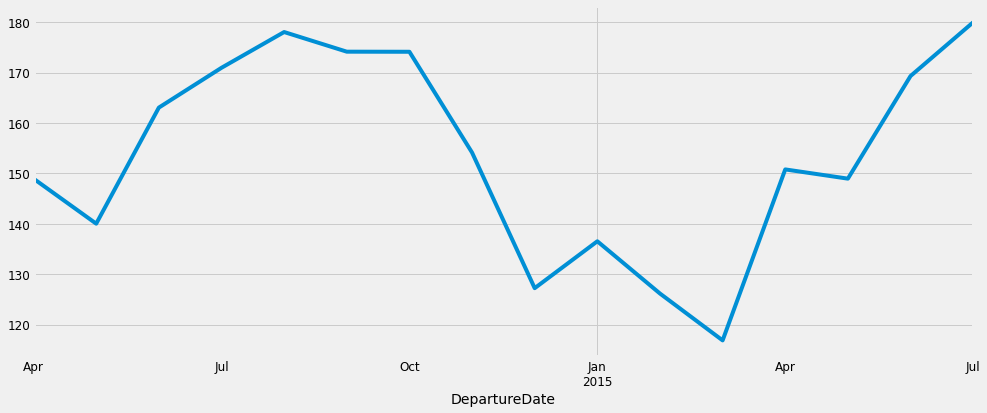

In [26]:
y.plot(figsize=(15, 6))
plt.show()

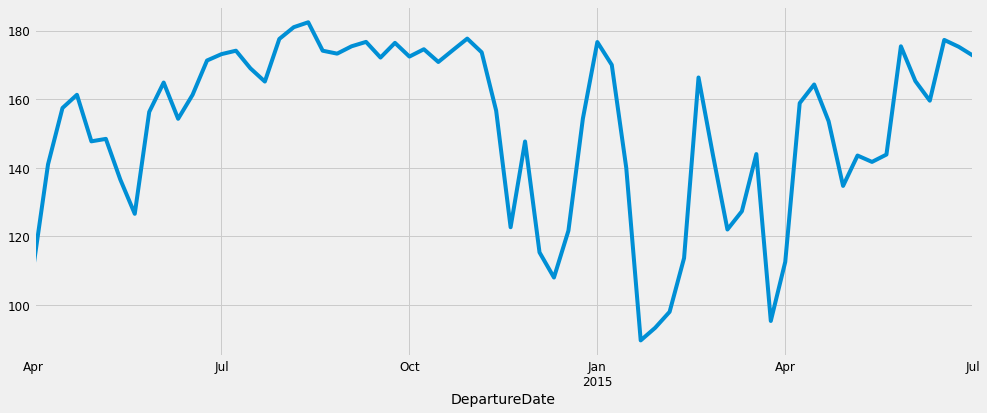

In [27]:
y = df_697_eco['CabinBookings'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

In [29]:
y['2014':]

DepartureDate
2014-04-06    111.500000
2014-04-13    141.000000
2014-04-20    157.428571
2014-04-27    161.285714
2014-05-04    147.714286
                 ...    
2015-06-07    165.285714
2015-06-14    159.571429
2015-06-21    177.285714
2015-06-28    175.285714
2015-07-05    172.666667
Freq: W-SUN, Name: CabinBookings, Length: 66, dtype: float64

In [32]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 16 observation(s)

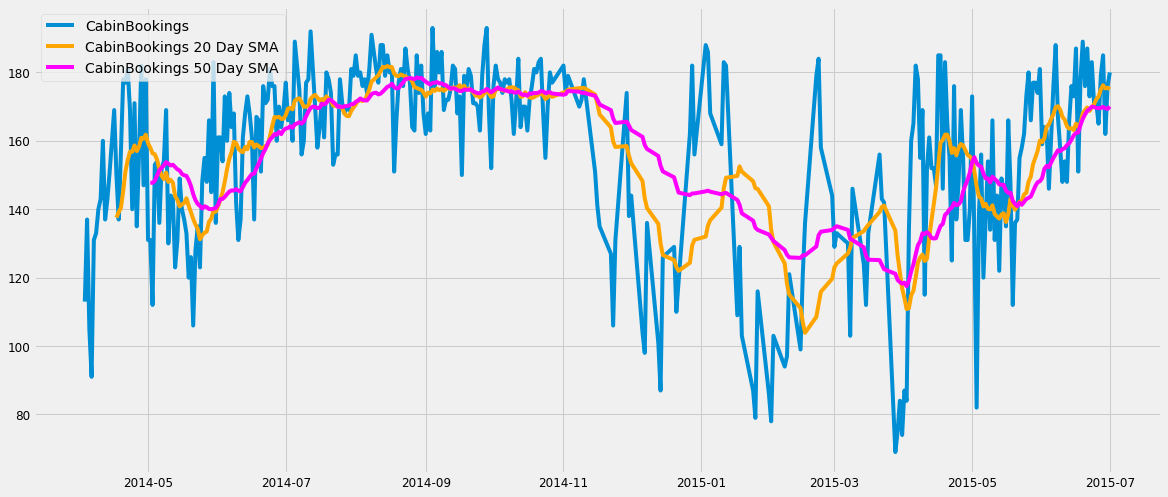

In [42]:
rolling_mean = df_697_eco.CabinBookings.rolling(window=15).mean()
rolling_mean2 = df_697_eco.CabinBookings.rolling(window=30).mean()
plt.plot(df_697_eco.DepartureDate, df_697_eco.CabinBookings, label='CabinBookings')
plt.plot(df_697_eco.DepartureDate, rolling_mean, label='CabinBookings 20 Day SMA', color='orange')
plt.plot(df_697_eco.DepartureDate, rolling_mean2, label='CabinBookings 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [41]:
rolling_mean.tail()

2521    170.0
2527    170.9
2533    171.1
2539    172.5
2545    173.8
Name: CabinBookings, dtype: float64

In [21]:
#from sklearn import preprocessing
def create_features(df, label=None):
    """
    Creates features from datetime index.
    """
    df = df.copy()
    #df['date'] = df.index
    df['depmonth'] = df['DepartureDate'].dt.month
    df['depday'] = df['DepartureDate'].dt.day
    df['depdayofweek'] = df['DepartureDate'].dt.dayofweek
    df['depquarter'] = df['DepartureDate'].dt.quarter
    df['depweekofyear'] = df['DepartureDate'].dt.weekofyear
    
    df['arrmonth'] = df['ArrivalDate'].dt.month
    df['arrday'] = df['ArrivalDate'].dt.day
    df['arrdayofweek'] = df['ArrivalDate'].dt.dayofweek
    df['arrquarter'] = df['ArrivalDate'].dt.quarter
    df['arrweekofyear'] = df['ArrivalDate'].dt.weekofyear
    #df['arryear'] = df['ArrivalDate'].dt.year
    #df['arrdayofyear'] = df['ArrivalDate'].dt.dayofyear
    
    
    df['dephour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%f').dt.hour
    df['arrhour'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M:%f').dt.hour
    
    """
    le = preprocessing.LabelEncoder()
    le.fit(df['Cabin'])
    print(le.classes_)
    df['Cabin'] = le.transform(df['Cabin'])
    """
    #df['Cabin_new'] = df['Cabin'].apply(lambda x: 1 if x=="Business Cabin" else 0)
    
    X = df[['DepartureDate', 'depmonth','depday','depdayofweek','depquarter','depweekofyear',
           'ArrivalDate', 'arrmonth','arrday','arrdayofweek', 'arrquarter','arrweekofyear',
           'dephour', 'arrhour', 'CabinBookings']]
    if label:
        y = df[label]
        return X, y
    return X

In [22]:
df_new = create_features(df_697_eco)

In [23]:
df_new.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [24]:
df_new.corr()

,depmonth,depday,depdayofweek,depquarter,depweekofyear,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
depmonth,1.000000,-0.025734,-0.011236,0.951568,0.968799,1.000000,-0.025734,-0.011236,0.951568,0.968799,NaN,NaN,0.350812
depday,-0.025734,1.000000,0.015046,-0.031218,0.063349,-0.025734,1.000000,0.015046,-0.031218,0.063349,NaN,NaN,0.046283
depdayofweek,-0.011236,0.015046,1.000000,-0.009209,-0.017680,-0.011236,0.015046,1.000000,-0.009209,-0.017680,NaN,NaN,-0.022753
depquarter,0.951568,-0.031218,-0.009209,1.000000,0.923795,0.951568,-0.031218,-0.009209,1.000000,0.923795,NaN,NaN,0.363710
depweekofyear,0.968799,0.063349,-0.017680,0.923795,1.000000,0.968799,0.063349,-0.017680,0.923795,1.000000,NaN,NaN,0.355320
arrmonth,1.000000,-0.025734,-0.011236,0.951568,0.968799,1.000000,-0.025734,-0.011236,0.951568,0.968799,NaN,NaN,0.350812
arrday,-0.025734,1.000000,0.015046,-0.031218,0.063349,-0.025734,1.000000,0.015046,-0.031218,0.063349,NaN,NaN,0.046283
arrdayofweek,-0.011236,0.015046,1.000000,-0.009209,-0.017680,-0.011236,0.015046,1.000000,-0.009209,-0.017680,NaN,NaN,-0.022753
arrquarter,0.951568,-0.031218,-0.009209,1.000000,0.923795,0.951568,-0.031218,-0.009209,1.000000,0.923795,NaN,NaN,0.363710
arrweekofyear,0.968799,0.063349,-0.017680,0.923795,1.000000,0.968799,0.063349,-0.017680,0.923795,1.000000,NaN,NaN,0.355320


In [25]:
import datetime
split_date = datetime.datetime(2015,4,1)

In [26]:
train = df_new[df_new["DepartureDate"] < split_date]
test = df_new[df_new["DepartureDate"] >= split_date]

In [27]:
df_new.shape

(367, 15)

In [28]:
train.shape

(275, 15)

In [29]:
test.shape

(92, 15)

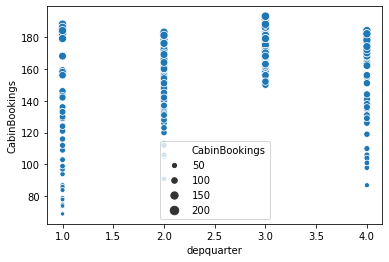

In [31]:
sns.scatterplot(x="depquarter", y="CabinBookings", size="CabinBookings", data=train)

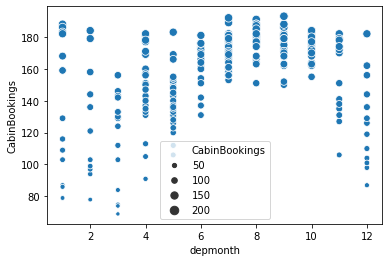

In [32]:
sns.scatterplot(x="depmonth", y="CabinBookings", size="CabinBookings", data=train)

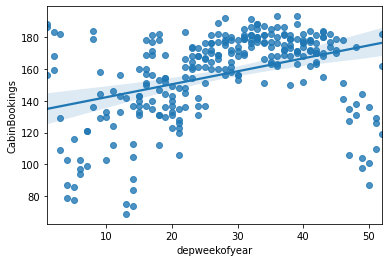

In [33]:
sns.regplot(x="depweekofyear", y="CabinBookings",data=train)

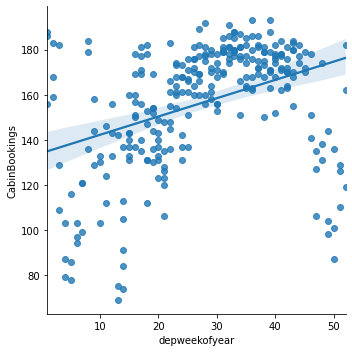

In [34]:
sns.lmplot(x="depweekofyear", y="CabinBookings",data=train)

In [35]:
train.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [36]:
train.corr()

,depmonth,depday,depdayofweek,depquarter,depweekofyear,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
depmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
depday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
depdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
depquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
depweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873
arrmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
arrday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
arrdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
arrquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
arrweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873


In [37]:
y_train = train["CabinBookings"]
X_train = train.drop(columns=["CabinBookings", "DepartureDate", "ArrivalDate", "depday", "depdayofweek",\
                              "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                             "dephour", "arrhour", ], axis=1)

In [38]:
X_train.head()

,depmonth,depquarter,depweekofyear
1,4,2,14
7,4,2,14
13,4,2,14
19,4,2,14
25,4,2,15


In [39]:
y_test = test["CabinBookings"]
X_test = test.drop(columns=["CabinBookings", "DepartureDate", "ArrivalDate", "depday", "depdayofweek",\
                              "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                             "dephour", "arrhour", ], axis=1)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 1 to 1993
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   depmonth       275 non-null    int64
 1   depquarter     275 non-null    int64
 2   depweekofyear  275 non-null    int64
dtypes: int64(3)
memory usage: 8.6 KB


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

19.625981250367815


In [45]:
from sklearn.tree import DecisionTreeRegressor 
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

17.0782867494824


In [46]:
from sklearn.ensemble import RandomForestRegressor 
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

17.05566523844513


In [64]:
def build_models(df):
    
    train = df[df["DepartureDate"] < split_date]
    test = df[df["DepartureDate"] >= split_date]
    
    df_train = create_features(train)
    df_test = create_features(test)

    y_train = df_train["CabinBookings"]
    X_train = df_train.drop(columns=["CabinBookings", "DepartureDate", "ArrivalDate", "depday", "depdayofweek",\
                                  "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                                 "dephour", "arrhour", ], axis=1)

    y_test = df_test["CabinBookings"]
    X_test = df_test.drop(columns=["CabinBookings", "DepartureDate", "ArrivalDate", "depday", "depdayofweek",\
                                  "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                                 "dephour", "arrhour", ], axis=1)

    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Linear Regression: ",mean_absolute_error(y_test, y_pred))

    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Decision Tree Regressor: ",mean_absolute_error(y_test, y_pred))

    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Random Forest Regressor: ",mean_absolute_error(y_test, y_pred))
    
    df_ = pd.DataFrame({"Actual Bookings" : y_test, "Predicted Bookings": y_pred})
    print(df_)
    
    test["Forecasted Bookings"] = y_pred
    return test

In [66]:
res = build_models(df_697_eco)
res.head()

mean_absolute_error of Linear Regression:  19.625981250367815
mean_absolute_error of Decision Tree Regressor:  17.0782867494824
mean_absolute_error of Random Forest Regressor:  16.98206050531594
      Actual Bookings  Predicted Bookings
1999               87          111.078151
2005               84          111.078151
2011              134          111.078151
2017              160          111.078151
2023              165          111.078151
...               ...                 ...
2521              179          170.986494
2527              185          170.986494
2533              162          170.072102
2539              176          170.072102
2545              180          174.656084

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1999,BOM,DXB,697,2015-04-01,09:15:00,2015-04-01,11:15:00,Economy Cabin,177,87,80.65,111.078151
2005,BOM,DXB,697,2015-04-02,09:15:00,2015-04-02,11:15:00,Economy Cabin,189,84,108.60,111.078151
2011,BOM,DXB,697,2015-04-03,09:15:00,2015-04-03,11:15:00,Economy Cabin,183,134,99.64,111.078151
2017,BOM,DXB,697,2015-04-04,09:15:00,2015-04-04,11:15:00,Economy Cabin,183,160,104.31,111.078151
2023,BOM,DXB,697,2015-04-05,09:15:00,2015-04-05,11:15:00,Economy Cabin,183,165,108.36,111.078151


In [67]:
build_models(df_698_eco)

mean_absolute_error of Linear Regression:  18.722040303094467
mean_absolute_error of Decision Tree Regressor:  15.94060559006211
mean_absolute_error of Random Forest Regressor:  15.991185096003024
      Actual Bookings  Predicted Bookings
4549              168          178.037560
4555              162          178.037560
4561              181          178.037560
4567              143          178.037560
4573              137          178.037560
...               ...                 ...
5071              173          176.129020
5077              159          176.129020
5083              182          183.243279
5089              173          183.243279
5095              176          174.732158

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4549,DXB,BOM,698,2015-04-01,12:15:00,2015-04-01,17:50:00,Economy Cabin,177,168,228.20,178.037560
4555,DXB,BOM,698,2015-04-02,12:15:00,2015-04-02,17:50:00,Economy Cabin,165,162,301.81,178.037560
4561,DXB,BOM,698,2015-04-03,12:15:00,2015-04-03,17:50:00,Economy Cabin,177,181,317.86,178.037560
4567,DXB,BOM,698,2015-04-04,12:15:00,2015-04-04,17:50:00,Economy Cabin,177,143,226.46,178.037560
4573,DXB,BOM,698,2015-04-05,12:15:00,2015-04-05,17:50:00,Economy Cabin,177,137,159.57,178.037560
...,...,...,...,...,...,...,...,...,...,...,...,...
5071,DXB,BOM,698,2015-06-27,12:15:00,2015-06-27,17:50:00,Economy Cabin,177,173,204.87,176.129020
5077,DXB,BOM,698,2015-06-28,12:15:00,2015-06-28,17:50:00,Economy Cabin,177,159,195.06,176.129020
5083,DXB,BOM,698,2015-06-29,12:15:00,2015-06-29,17:50:00,Economy Cabin,177,182,168.21,183.243279
5089,DXB,BOM,698,2015-06-30,12:15:00,2015-06-30,17:50:00,Economy Cabin,171,173,176.86,183.243279


In [68]:
build_models(df_868_eco)

mean_absolute_error of Linear Regression:  21.19156344641146
mean_absolute_error of Decision Tree Regressor:  15.217132505175984
mean_absolute_error of Random Forest Regressor:  15.2558629815233
      Actual Bookings  Predicted Bookings
4551              170          173.804029
4557              153          173.804029
4563              143          173.804029
4569              155          173.804029
4575              166          173.804029
...               ...                 ...
5073              180          166.926457
5079              184          166.926457
5085              178          167.929012
5091              173          167.929012
5097              175          173.532956

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4551,DXB,BOM,868,2015-04-01,16:35:00,2015-04-01,22:10:00,Economy Cabin,177,170,254.06,173.804029
4557,DXB,BOM,868,2015-04-02,16:35:00,2015-04-02,22:10:00,Economy Cabin,159,153,327.36,173.804029
4563,DXB,BOM,868,2015-04-03,16:35:00,2015-04-03,22:10:00,Economy Cabin,150,143,290.37,173.804029
4569,DXB,BOM,868,2015-04-04,16:35:00,2015-04-04,22:10:00,Economy Cabin,171,155,185.42,173.804029
4575,DXB,BOM,868,2015-04-05,16:35:00,2015-04-05,22:10:00,Economy Cabin,177,166,145.41,173.804029
...,...,...,...,...,...,...,...,...,...,...,...,...
5073,DXB,BOM,868,2015-06-27,16:35:00,2015-06-27,22:10:00,Economy Cabin,177,180,186.71,166.926457
5079,DXB,BOM,868,2015-06-28,16:35:00,2015-06-28,22:10:00,Economy Cabin,177,184,175.35,166.926457
5085,DXB,BOM,868,2015-06-29,16:35:00,2015-06-29,22:10:00,Economy Cabin,177,178,179.07,167.929012
5091,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Economy Cabin,171,173,173.92,167.929012


In [69]:
build_models(df_869_eco)

mean_absolute_error of Linear Regression:  26.790504858857126
mean_absolute_error of Decision Tree Regressor:  19.59109730848861
mean_absolute_error of Random Forest Regressor:  19.391424995596203
      Actual Bookings  Predicted Bookings
2001               70           97.812425
2007               99           97.812425
2013              101           97.812425
2019              112           97.812425
2025              110           97.812425
...               ...                 ...
2523              162          164.231941
2529              177          164.231941
2535              168          172.517385
2541              191          172.517385
2547              169          171.968501

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2001,BOM,DXB,869,2015-04-01,13:30:00,2015-04-01,15:30:00,Economy Cabin,171,70,91.28,97.812425
2007,BOM,DXB,869,2015-04-02,13:30:00,2015-04-02,15:30:00,Economy Cabin,195,99,104.33,97.812425
2013,BOM,DXB,869,2015-04-03,13:30:00,2015-04-03,15:30:00,Economy Cabin,162,101,103.28,97.812425
2019,BOM,DXB,869,2015-04-04,13:30:00,2015-04-04,15:30:00,Economy Cabin,183,112,104.03,97.812425
2025,BOM,DXB,869,2015-04-05,13:30:00,2015-04-05,15:30:00,Economy Cabin,177,110,116.56,97.812425
...,...,...,...,...,...,...,...,...,...,...,...,...
2523,BOM,DXB,869,2015-06-27,13:30:00,2015-06-27,15:30:00,Economy Cabin,165,162,162.94,164.231941
2529,BOM,DXB,869,2015-06-28,13:30:00,2015-06-28,15:30:00,Economy Cabin,177,177,198.25,164.231941
2535,BOM,DXB,869,2015-06-29,13:30:00,2015-06-29,15:30:00,Economy Cabin,171,168,155.53,172.517385
2541,BOM,DXB,869,2015-06-30,13:30:00,2015-06-30,15:30:00,Economy Cabin,189,191,130.72,172.517385


In [70]:
build_models(df_870_eco)

mean_absolute_error of Linear Regression:  33.58620964075852
mean_absolute_error of Decision Tree Regressor:  22.485766045548658
mean_absolute_error of Random Forest Regressor:  22.360847044561712
      Actual Bookings  Predicted Bookings
2003               75          109.891802
2009              114          109.891802
2015               71          109.891802
2021              105          109.891802
2027               96          109.891802
...               ...                 ...
2525              183          177.843458
2531              175          177.843458
2537              177          175.534631
2543              177          175.534631
2549              170          178.167960

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2003,BOM,DXB,870,2015-04-01,19:10:00,2015-04-01,21:10:00,Economy Cabin,183,75,71.10,109.891802
2009,BOM,DXB,870,2015-04-02,19:10:00,2015-04-02,21:10:00,Economy Cabin,183,114,87.26,109.891802
2015,BOM,DXB,870,2015-04-03,19:10:00,2015-04-03,21:10:00,Economy Cabin,156,71,87.35,109.891802
2021,BOM,DXB,870,2015-04-04,19:10:00,2015-04-04,21:10:00,Economy Cabin,150,105,88.35,109.891802
2027,BOM,DXB,870,2015-04-05,19:10:00,2015-04-05,21:10:00,Economy Cabin,150,96,107.64,109.891802
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,BOM,DXB,870,2015-06-27,19:10:00,2015-06-27,21:10:00,Economy Cabin,183,183,137.91,177.843458
2531,BOM,DXB,870,2015-06-28,19:10:00,2015-06-28,21:10:00,Economy Cabin,183,175,227.25,177.843458
2537,BOM,DXB,870,2015-06-29,19:10:00,2015-06-29,21:10:00,Economy Cabin,177,177,153.93,175.534631
2543,BOM,DXB,870,2015-06-30,19:10:00,2015-06-30,21:10:00,Economy Cabin,183,177,107.63,175.534631


In [71]:
build_models(df_871_eco)

mean_absolute_error of Linear Regression:  30.667220726279492
mean_absolute_error of Decision Tree Regressor:  22.111801242236027
mean_absolute_error of Random Forest Regressor:  22.265248705535356
      Actual Bookings  Predicted Bookings
4553              173          180.631500
4559              177          180.631500
4565              146          180.631500
4571               79          180.631500
4577               88          180.631500
...               ...                 ...
5075              174          180.910049
5081              177          180.910049
5087              178          176.777246
5093              166          176.777246
5099              176          188.425403

[92 rows x 2 columns]


<ipython-input-64-5e78f6fece2b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4553,DXB,BOM,871,2015-04-01,22:15:00,2015-04-02,04:00:00,Economy Cabin,177,173,205.88,180.631500
4559,DXB,BOM,871,2015-04-02,22:15:00,2015-04-03,04:00:00,Economy Cabin,177,177,349.75,180.631500
4565,DXB,BOM,871,2015-04-03,22:15:00,2015-04-04,04:00:00,Economy Cabin,150,146,222.24,180.631500
4571,DXB,BOM,871,2015-04-04,22:15:00,2015-04-05,04:00:00,Economy Cabin,150,79,171.52,180.631500
4577,DXB,BOM,871,2015-04-05,22:15:00,2015-04-06,04:00:00,Economy Cabin,156,88,133.42,180.631500
...,...,...,...,...,...,...,...,...,...,...,...,...
5075,DXB,BOM,871,2015-06-27,22:15:00,2015-06-28,04:00:00,Economy Cabin,177,174,147.70,180.910049
5081,DXB,BOM,871,2015-06-28,22:15:00,2015-06-29,04:00:00,Economy Cabin,177,177,148.49,180.910049
5087,DXB,BOM,871,2015-06-29,22:15:00,2015-06-30,04:00:00,Economy Cabin,177,178,148.07,176.777246
5093,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Economy Cabin,177,166,144.76,176.777246
